In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [ ]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)

In [ ]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


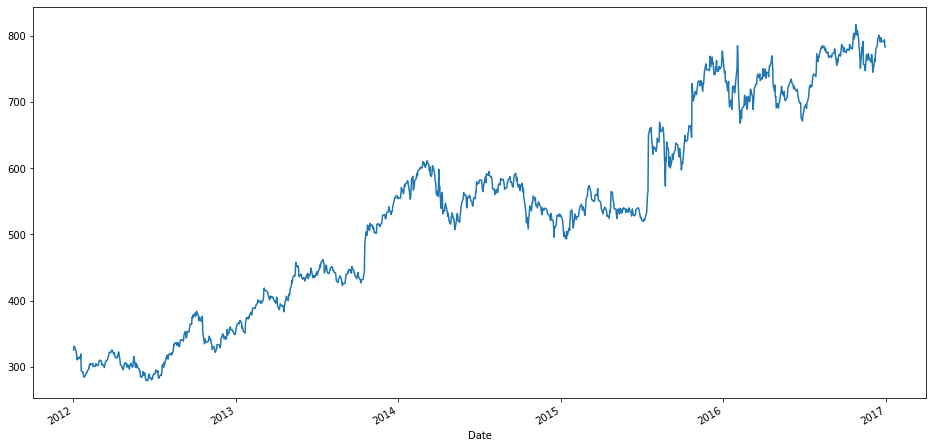

In [ ]:
dataset['Open'].plot(figsize=(16,8))

In [ ]:
dataset["Volume"]=dataset["Volume"].str.replace(',','').astype(float)

In [ ]:
#convert column "a" of a DataFrame
dataset["Close"]=dataset["Close"].str.replace(',','').astype(float)

In [ ]:
#7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Volume
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,6.531857e+06


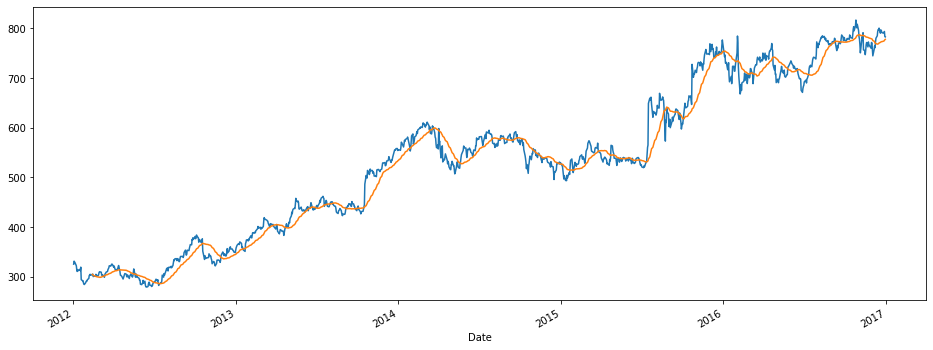

In [ ]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Open'].plot()

In [ ]:
dataset['Close: 30 Day Mean']=dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

DataError: ignored

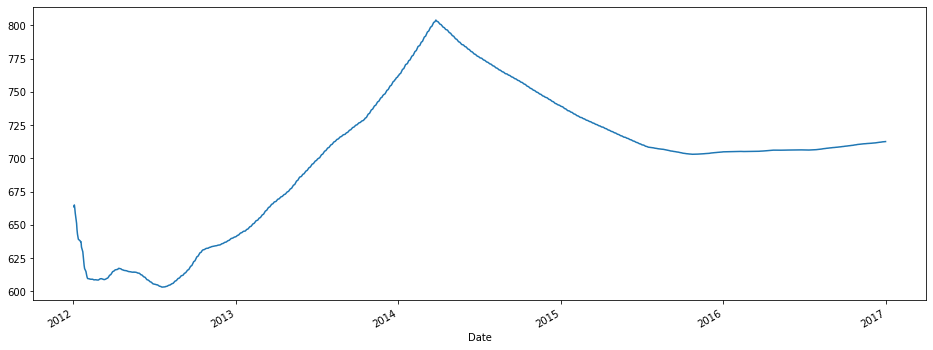

In [ ]:
#Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [ ]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [ ]:
#Data cleaning
dataset.isna().any()

Open                  False
High                  False
Low                   False
Close                 False
Volume                False
Close: 30 Day Mean     True
dtype: bool

In [ ]:
#Featur Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [ ]:
#Creating a data structure with 60 timesteps and 1 output
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
#Reshaping
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
#part2- Building the RNN
#Importing the libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor=Sequential()

In [ ]:
#Adding first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
#Adding second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences =True))
regressor.add(Dropout(0.2))
#Adding a third LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))
#Adding a fourth LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units =50))
regressor.add(Dropout (0.2))
#Adding the output Layer
regressor.add(Dense (units = 1))

In [ ]:
#Compiling the RNN
regressor.compile(optimizer = 'adam', loss ='mean_squared_error')
#Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs=100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 8s 74ms/step - loss: 0.0310
Epoch 2/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0048
Epoch 5/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0050
Epoch 13/100
38/38 [=====

In [ ]:
# Part 3 - Making the predictions and visualising the results
# Getting the real stock price of 2017
dataset_test= pd.read_csv('Google_Stock_Price_Test.csv', index_col="Date", parse_dates=True)

In [ ]:
real_stock_price =dataset_test.iloc[:, 1:2].values
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,1657300.0
2017-01-04,788.36,791.34,783.16,786.90,1073000.0
2017-01-05,786.08,794.48,785.02,794.02,1335200.0
2017-01-06,795.26,807.90,792.20,806.15,1640200.0
2017-01-09,806.40,809.97,802.83,806.65,1272400.0


In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [ ]:
dataset_test["Volume"]=dataset_test["Volume"].str.replace(',','').astype(float)

In [ ]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [ ]:
#Getting the predicted stock price of 2017
dataset_total= pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs= dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs= inputs.reshape(-1,1)
inputs= sc.transform(inputs)
x_test= []
for i in range(60, 80):
  x_test.append(inputs[i-60:i, 0])
x_test =np.array(x_test)
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


1/1 [==============================] - 1s 1s/step


In [ ]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


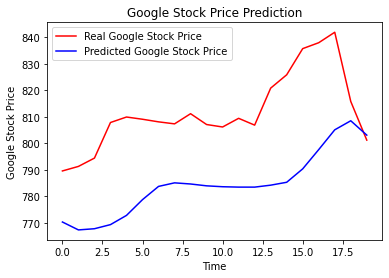

In [ ]:
#Visulising the results
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
# nsamples, nx, ny = x_train.shape
# d2_train_dataset = x_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = x_train.shape
d2_train_dataset = x_train.reshape((nsamples,nx*ny))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)


In [ ]:
classifier.fit(x_train,y_train)

ValueError: ignored

In [ ]:
y_pred=classifier.predict(x_test)

NotFittedError: ignored